# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df.shape

(32561, 15)

## Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Missing Values

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

**There are no missing values in the dataset**

### Duplicates

In [5]:
df.duplicated().sum()

24

In [6]:
## Drop the duplicates
df = df.drop_duplicates()

### Data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


### Unique values in each column

In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

### Statistics of the data

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Exploring the data

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
print("Categories in 'workclass' variable:     ",end=" " )
print(df['workclass'].unique())

print("Categories in 'education' variable:  ",end=" ")
print(df['education'].unique())

print("Categories in'marital status' variable:",end=" " )
print(df['marital-status'].unique())

print("Categories in 'occupation' variable:     ",end=" " )
print(df['occupation'].unique())

print("Categories in 'relationship' variable:     ",end=" " )
print(df['relationship'].unique())

print("Categories in 'race' variable:     ",end=" " )
print(df['race'].unique())

print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'country' variable:     ",end=" " )
print(df['country'].unique())

Categories in 'workclass' variable:      [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Categories in 'education' variable:   [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Categories in'marital status' variable: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Categories in 'occupation' variable:      [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Categories in 'relationship' variable:      [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Categories in 'rac

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']

We have 8 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']


In [13]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


# Exploratory Data Analysis

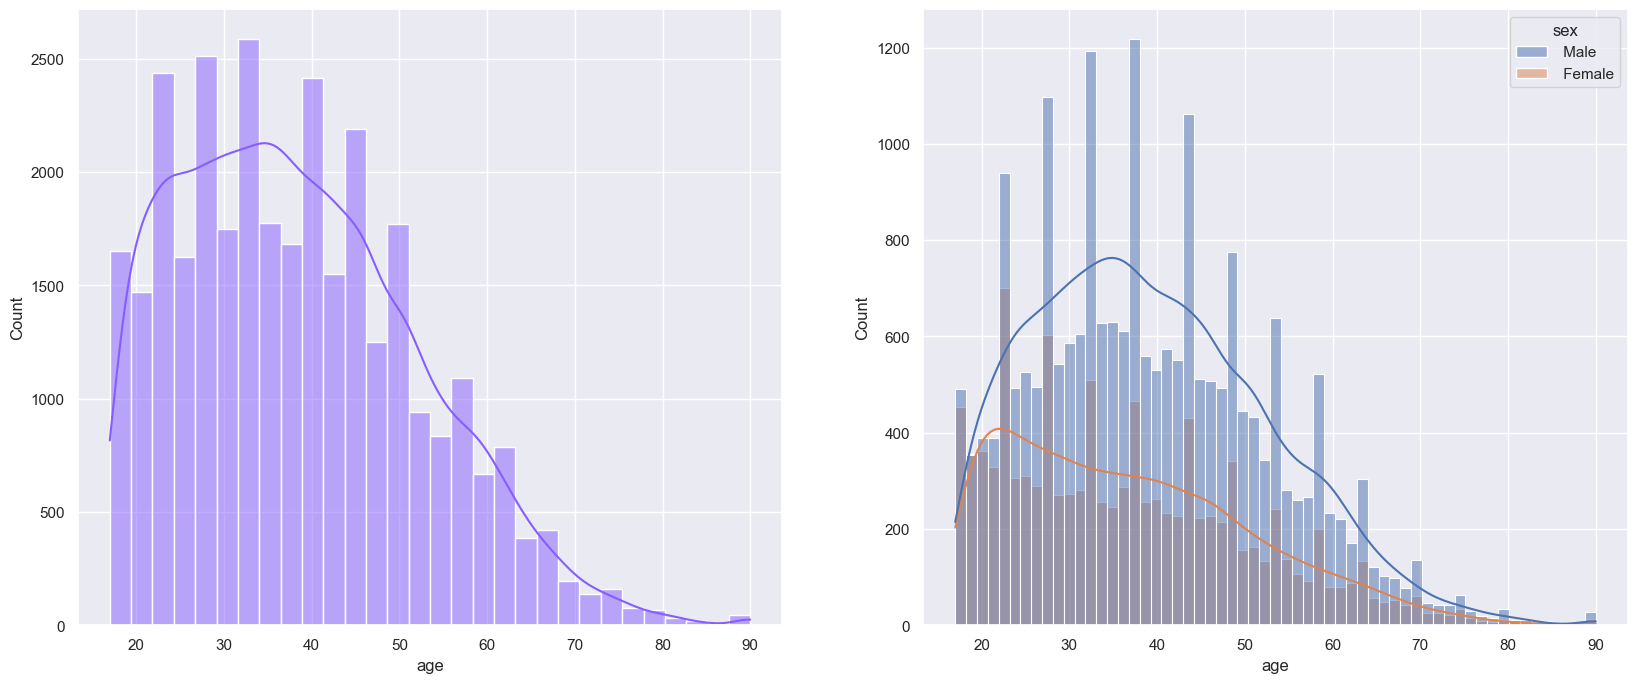

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df, x='age', bins=30, kde=True, color='#865DFF')
plt.subplot(122)
sns.histplot(data=df, x='age', kde=True, hue='sex')
plt.show()

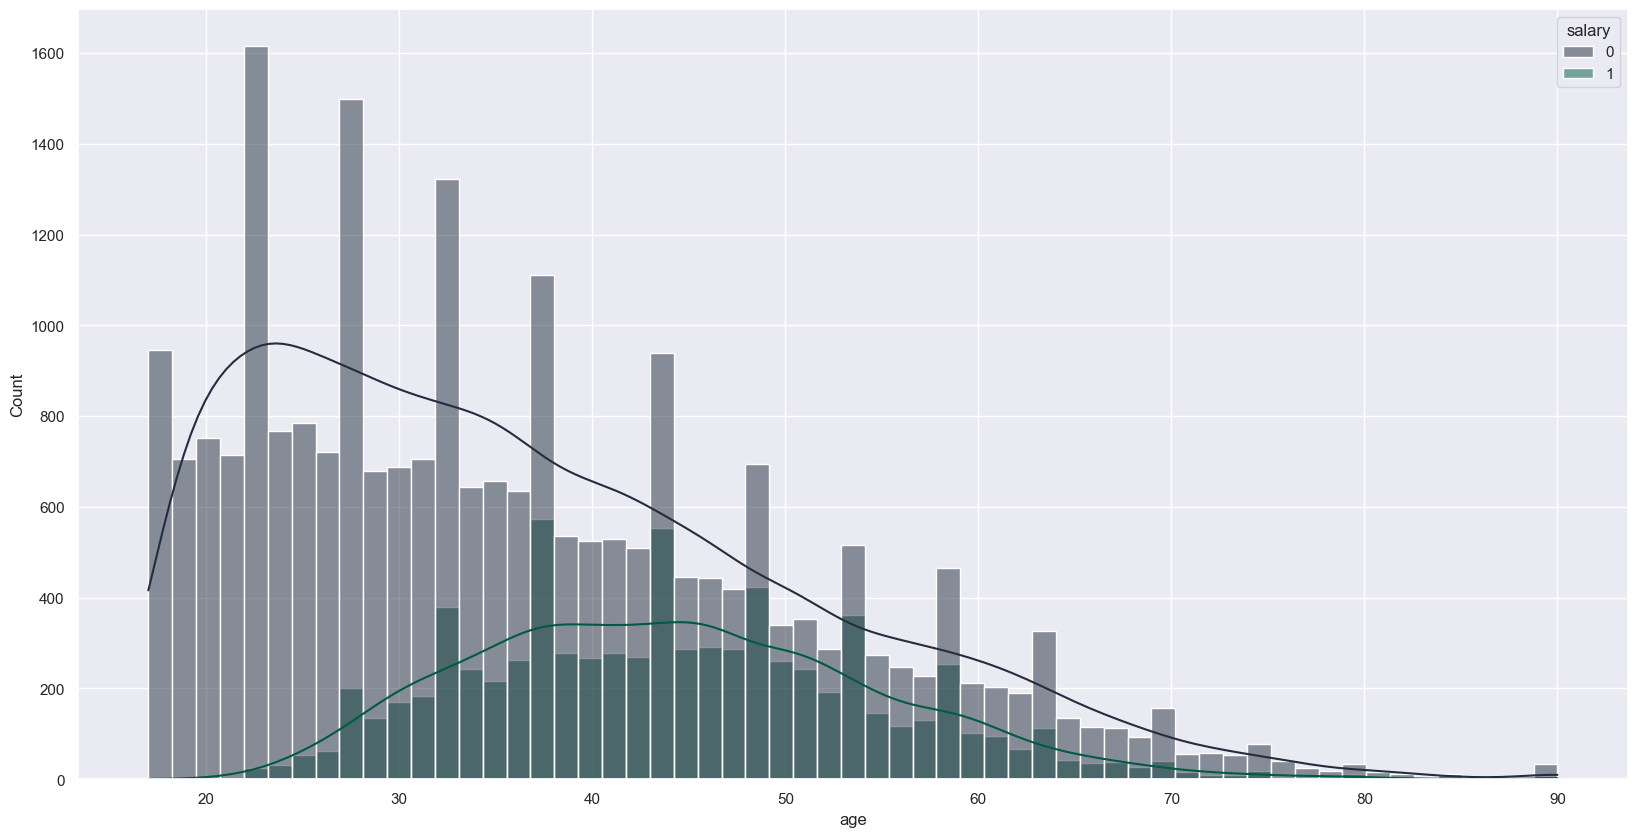

In [15]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='age', kde=True, hue='salary', palette={0: "#232D3F", 1: "#005B41"})
plt.show()

**Insight: Age feature is skewed**

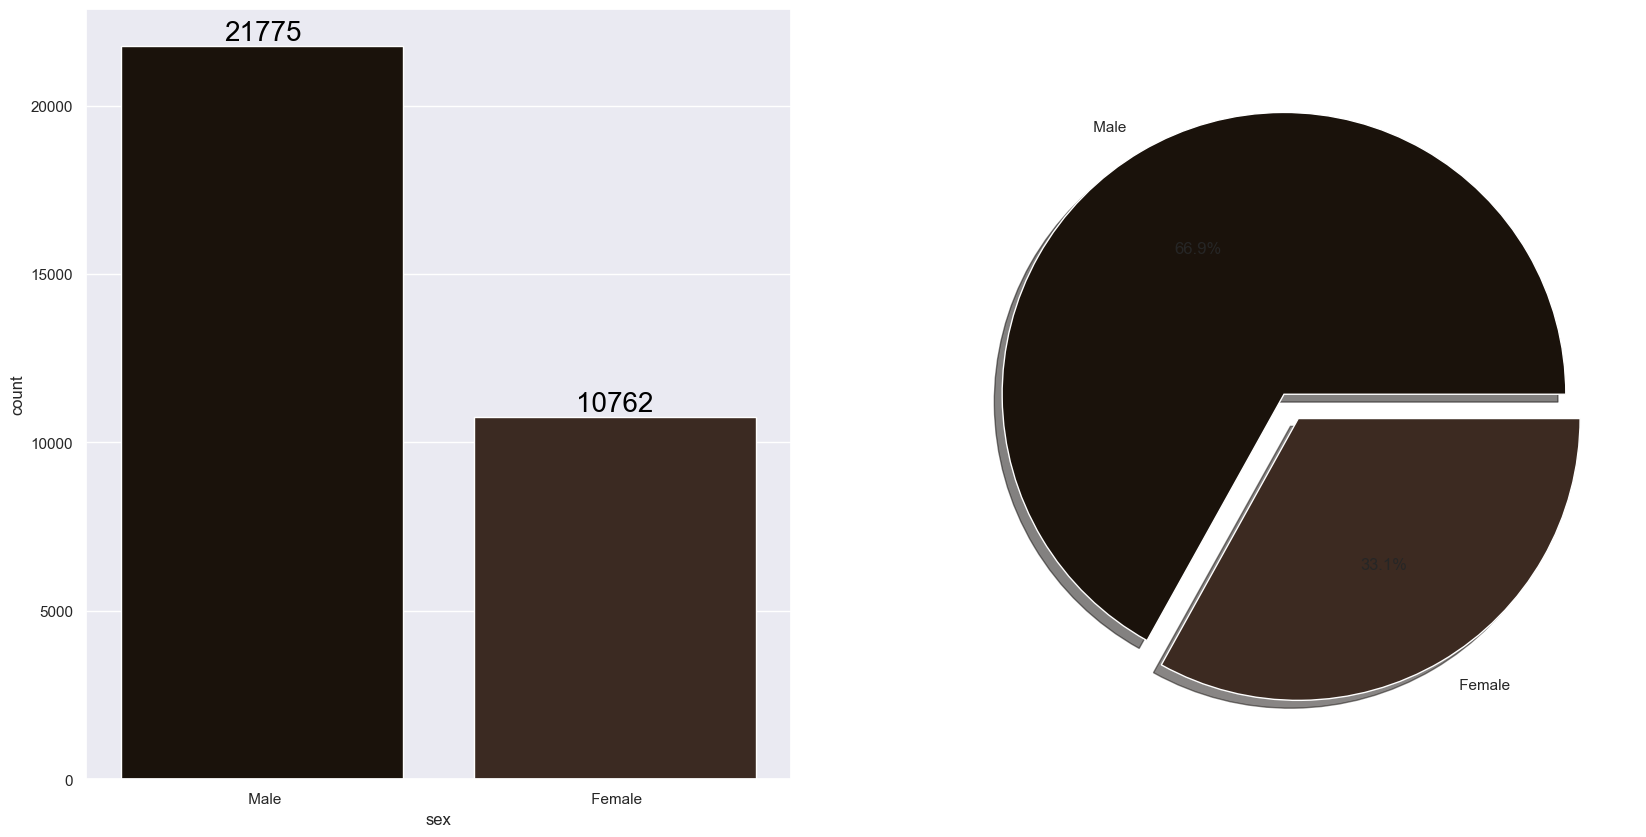

In [16]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

custom_palette = {' Male': '#1A120B', ' Female': '#3C2A21'}

sns.countplot(x='sex', data=df, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['sex'].value_counts(), labels=[' Male', ' Female'], explode=[0, 0.1], 
        autopct='%1.1f%%', shadow=True, colors=['#1A120B', '#3C2A21'])

plt.show()

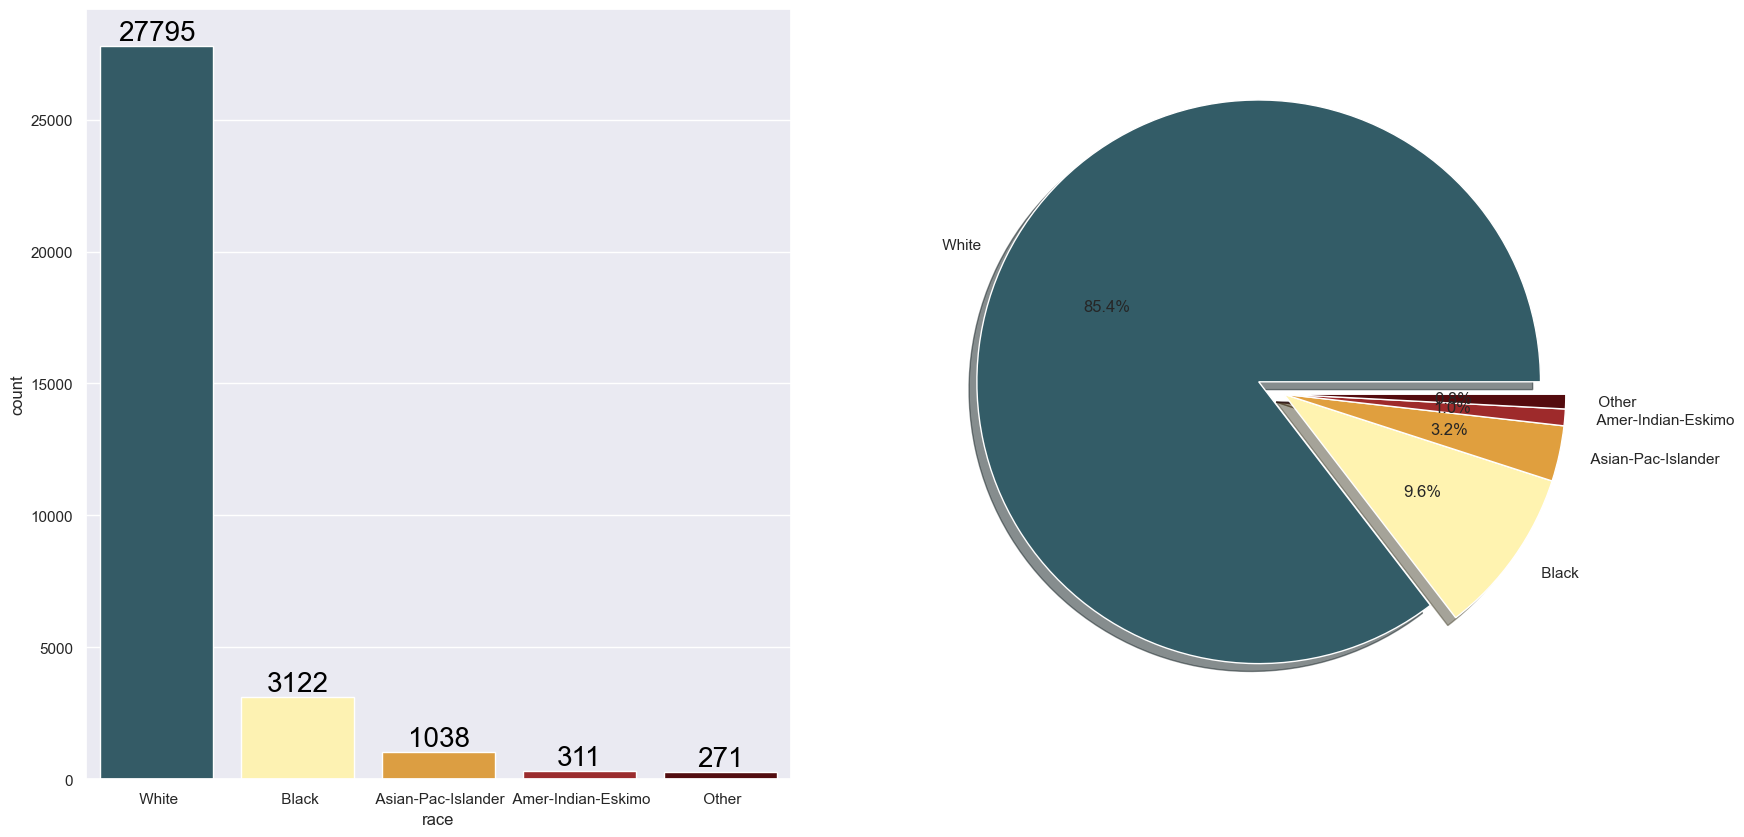

In [17]:
custom_palette = ['#335c67', '#fff3b0', '#e09f3e', '#9e2a2b', '#540b0e']

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race', data=df, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['race'].value_counts(), labels=df['race'].value_counts().index, explode=[0.1, 0, 0, 0, 0],
        autopct='%1.1f%%', shadow=True, colors=custom_palette)

plt.show()

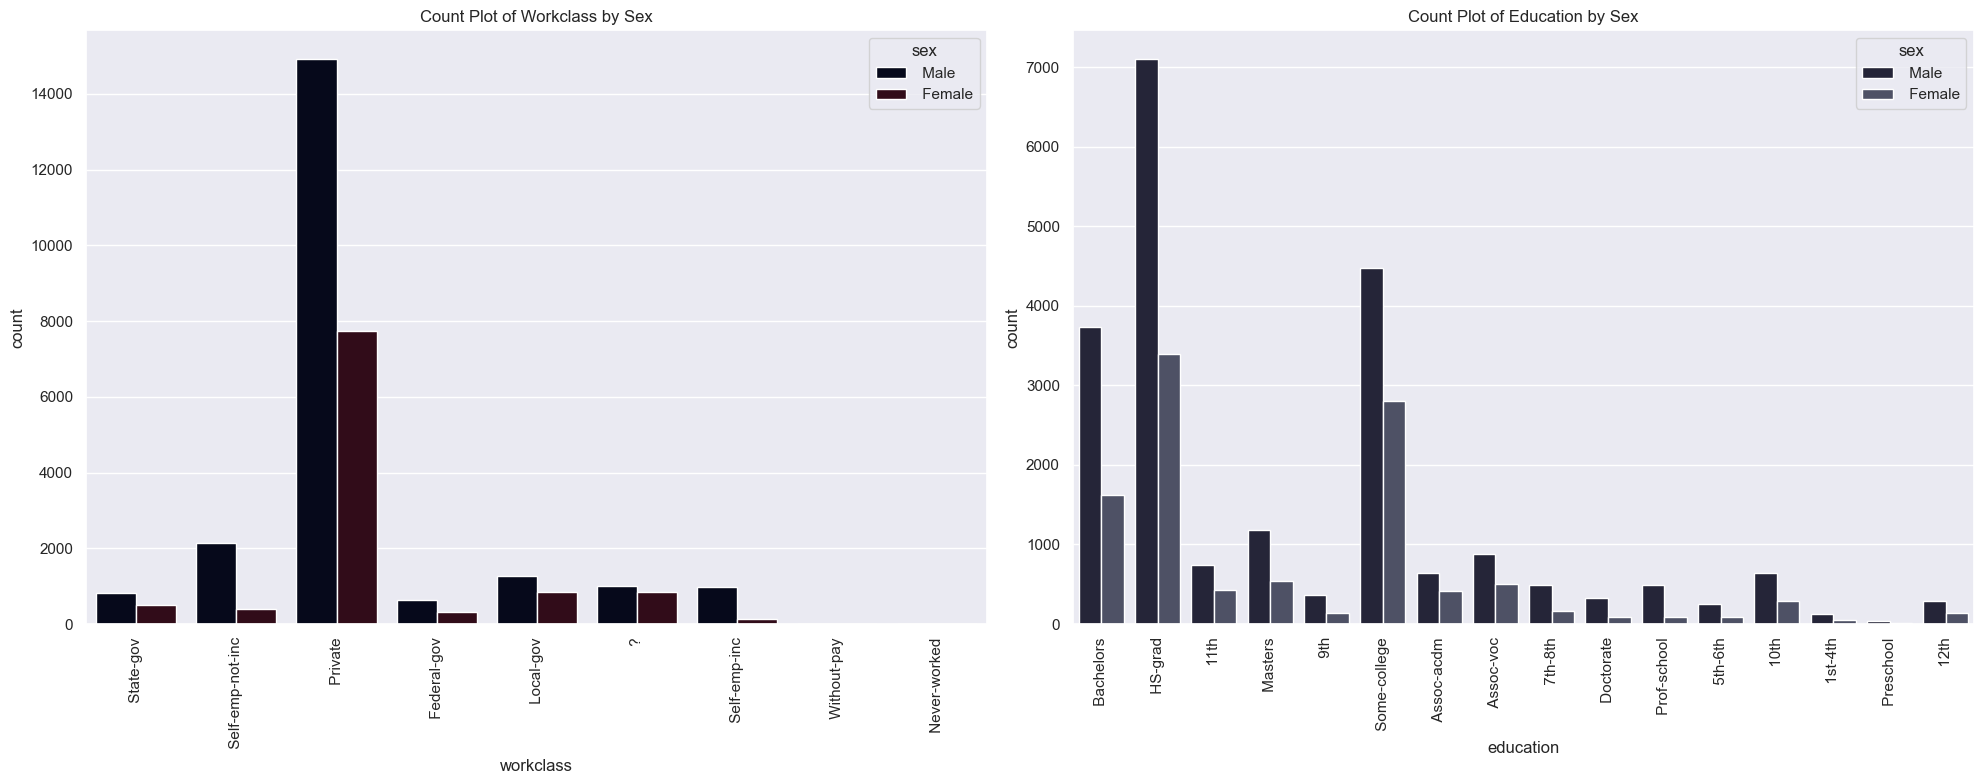

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
custom_palette = {' Male': '#03071e', ' Female': '#370617'}
custom_palette2 = {' Male': '#22223b', ' Female': '#4a4e69'}

plt.subplot(121)
sns.countplot(data=df, x='workclass', hue='sex', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Count Plot of Workclass by Sex')

plt.subplot(122)
sns.countplot(data=df, x='education', hue='sex', palette=custom_palette2)
plt.xticks(rotation=90)
plt.title('Count Plot of Education by Sex')

plt.tight_layout()
plt.show()

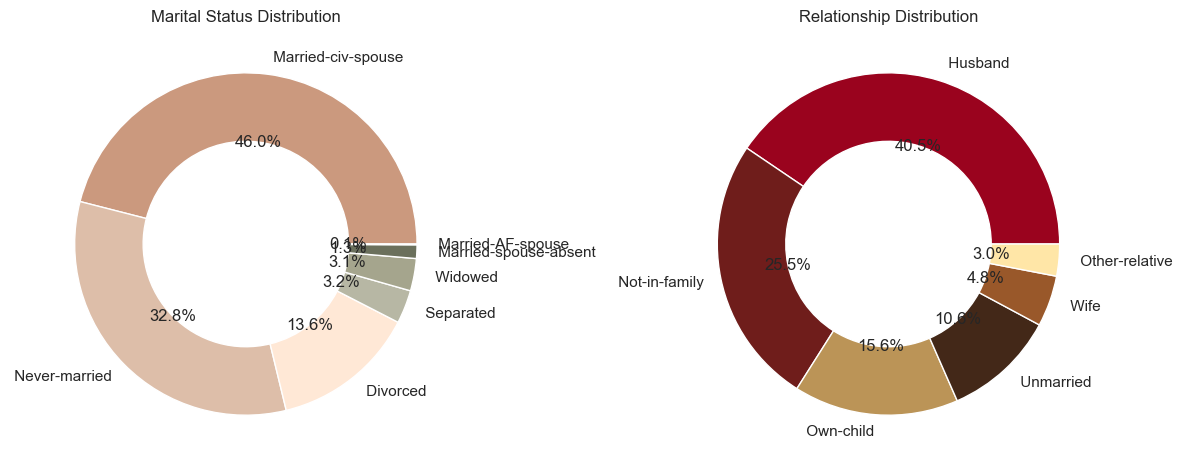

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ['#cb997e', '#ddbea9', '#ffe8d6', '#b7b7a4', '#a5a58d', '#6b705c']
custom_palette2 = ['#9a031e', '#6f1d1b', '#bb9457', '#432818', '#99582a', '#ffe6a7']

plt.subplot(121)
marital_status_counts = df['marital-status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', 
        colors=custom_palette[:len(marital_status_counts)], wedgeprops=dict(width=0.4))
plt.title('Marital Status Distribution')

# Second plot: pie chart for relationship distribution with custom colors
plt.subplot(122)
relationship_counts = df['relationship'].value_counts()
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', 
        colors=custom_palette2[:len(relationship_counts)], wedgeprops=dict(width=0.4))
plt.title('Relationship Distribution')

plt.tight_layout()
plt.show()

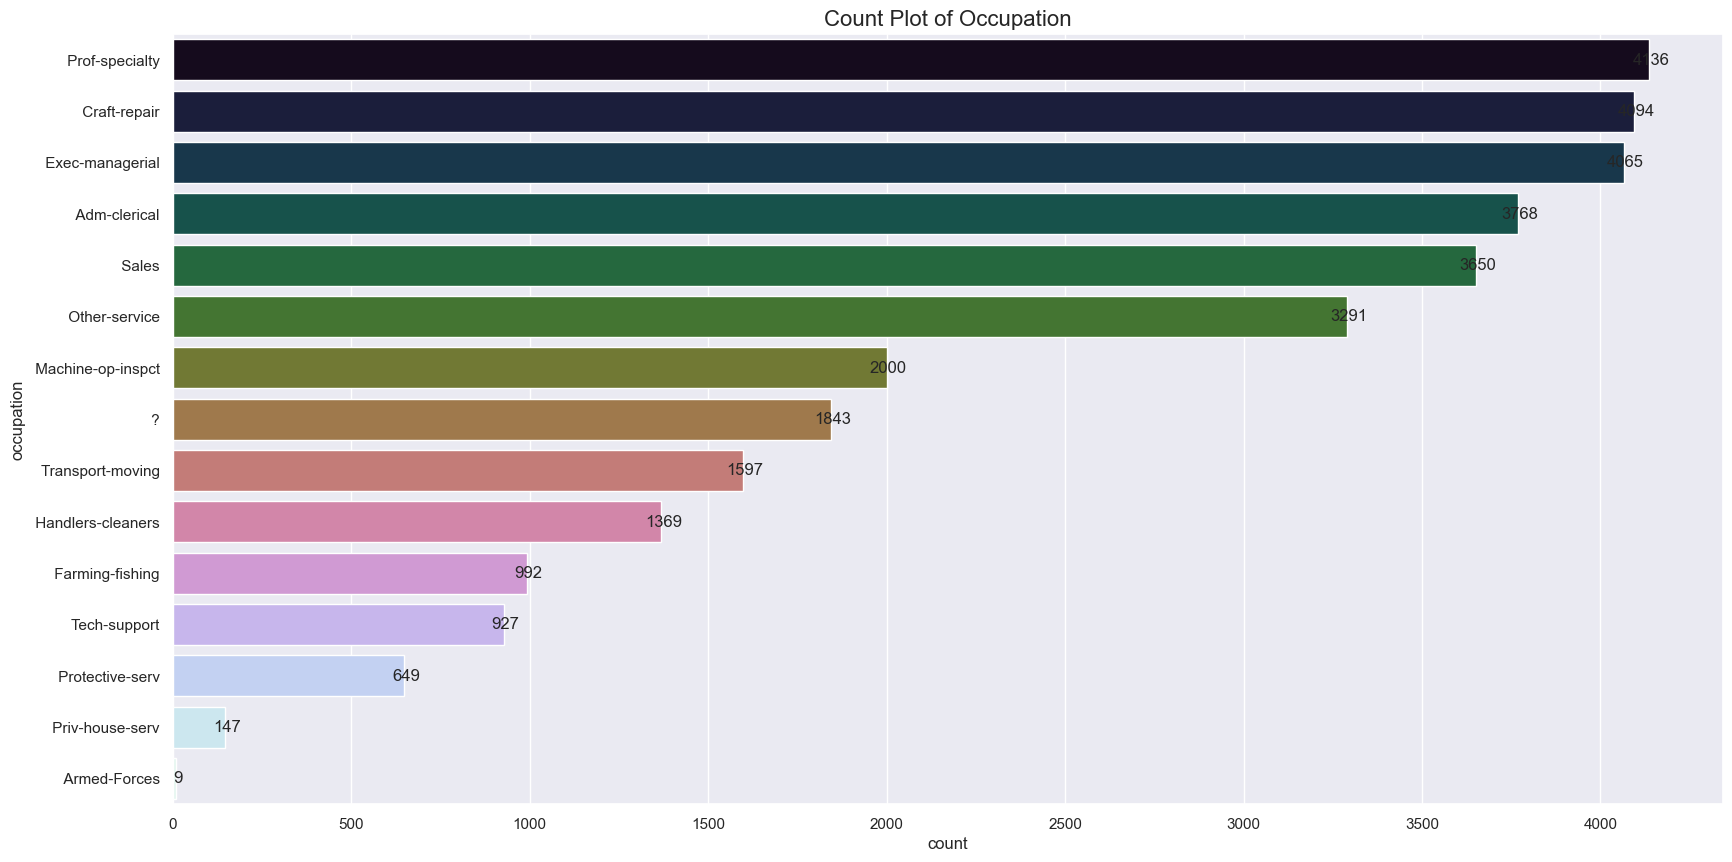

In [20]:
plt.figure(figsize=(20, 10))
occupation_counts = df['occupation'].value_counts().sort_values(ascending=False)
sns.countplot(y=df['occupation'], data=df, order=occupation_counts.index, palette='cubehelix', saturation=0.95)
plt.xticks(rotation=0)  # Rotating labels on y-axis
plt.title('Count Plot of Occupation', fontsize=16)

for i, count in enumerate(occupation_counts):
    plt.text(count + 5, i, str(count), ha='center', va='center', fontsize=12)

plt.show()

### Salary Distribution

**0 --> Salary is less that or equal to 50K**

**1 --> Salary is more than 50K**

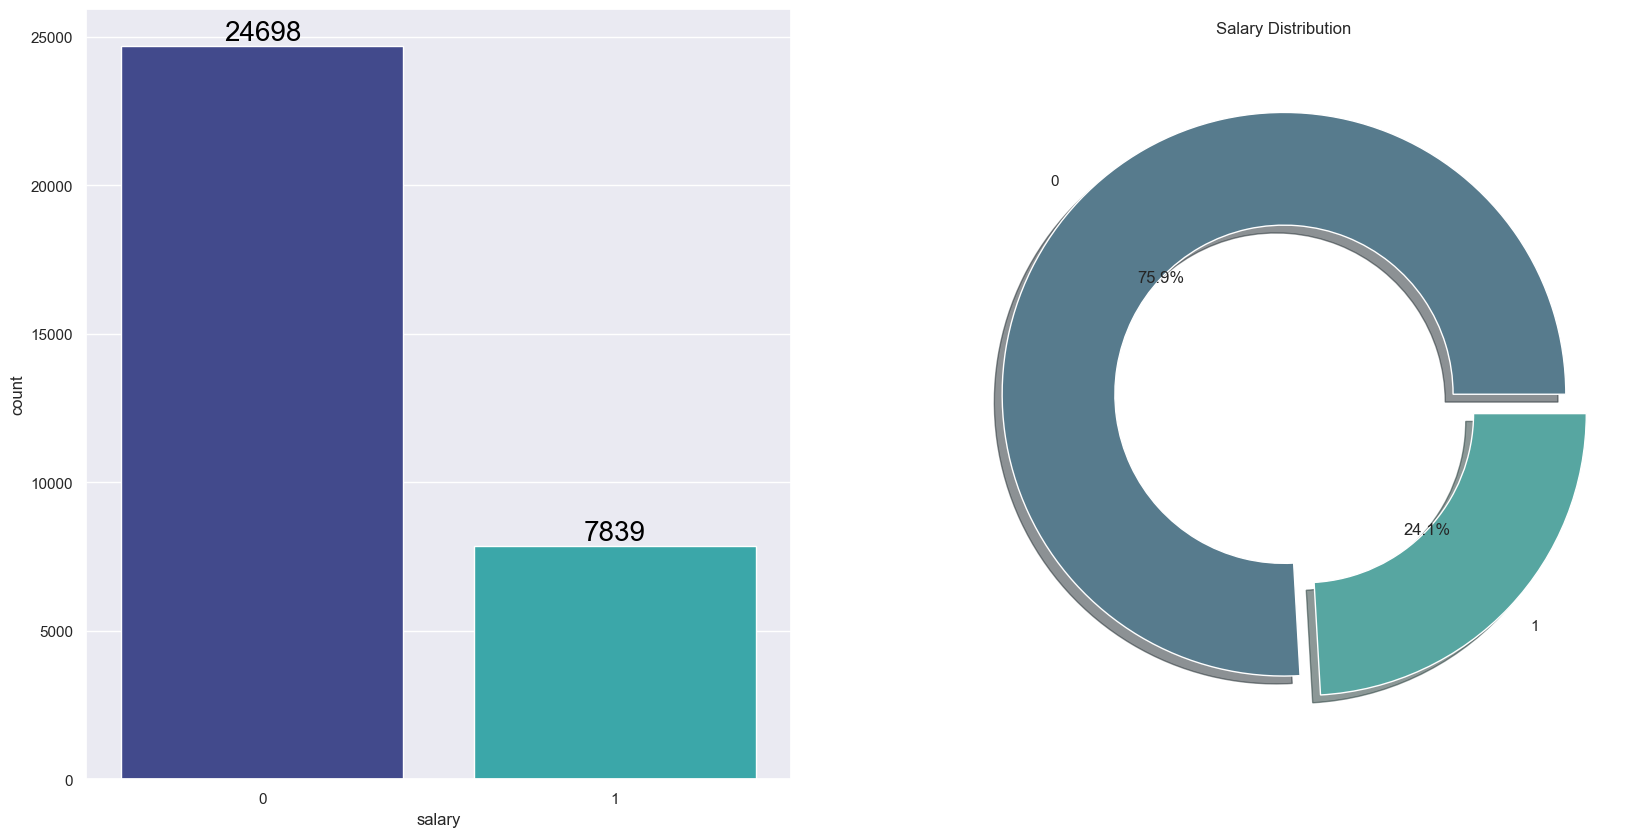

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df['salary'], data=df, palette='mako', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Donut chart
ax[1].pie(x=df['salary'].value_counts(), labels=[0, 1], explode=[0, 0.1], autopct='%1.1f%%', 
           shadow=True, colors=['#577B8D', '#57A6A1'], wedgeprops={'width': 0.4})
ax[1].set_aspect('equal') 
ax[1].set_title('Salary Distribution')

plt.show()

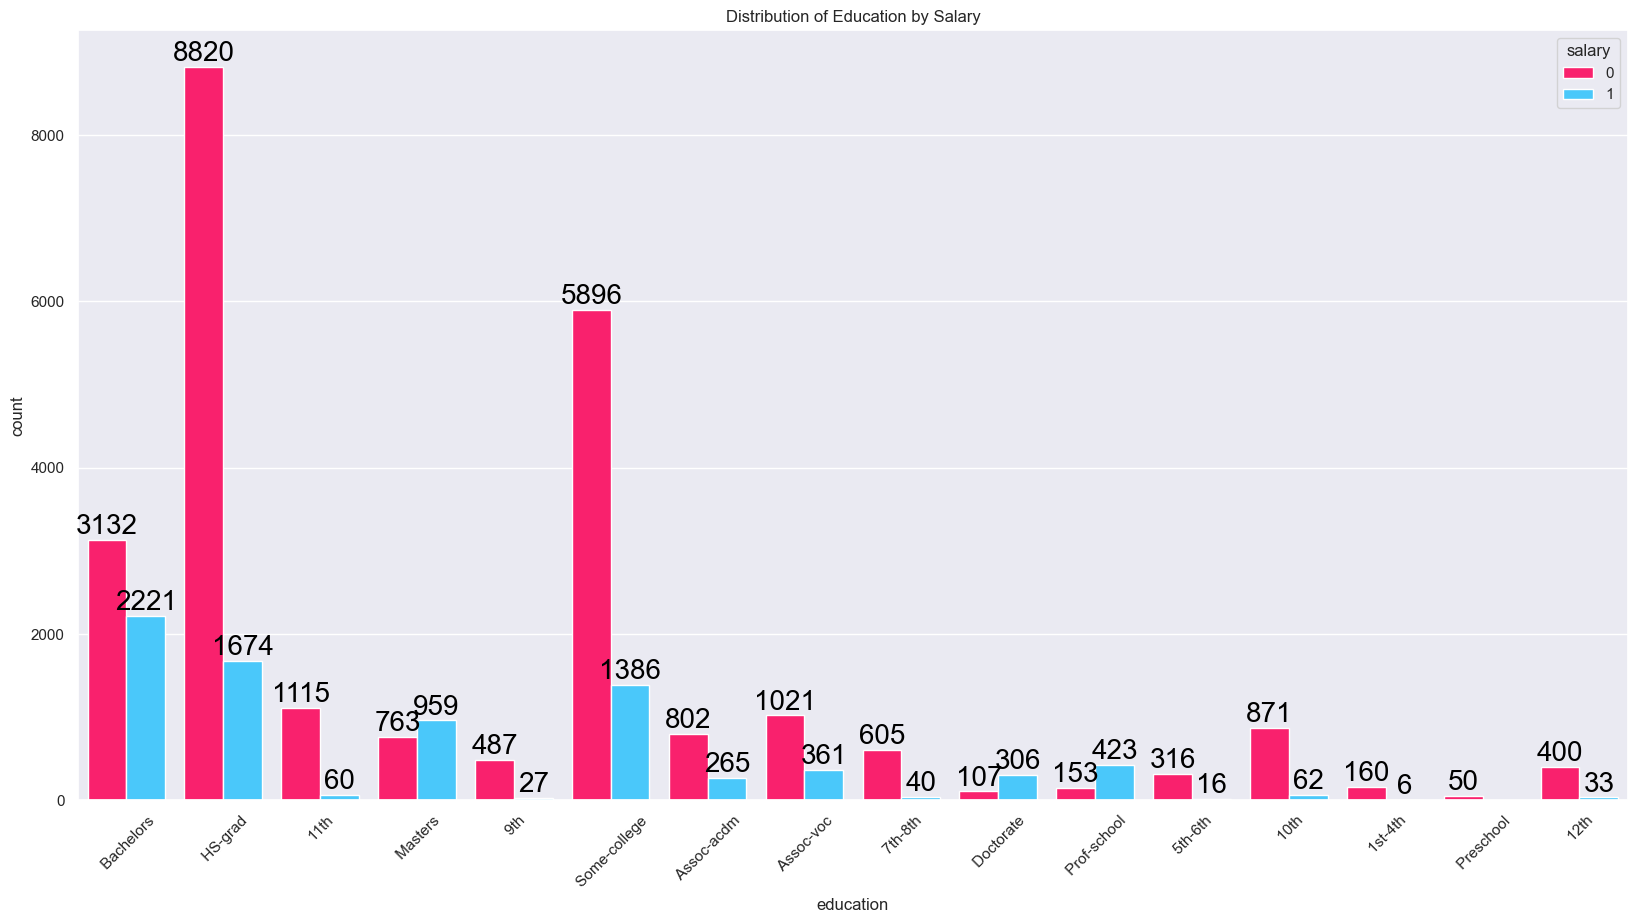

In [22]:
custom_palette = {0: '#ff1b6b', 1: '#45caff'}

plt.figure(figsize=(20, 10))
ax = plt.subplot()
sns.countplot(x='education', data=df, palette=custom_palette, hue='salary', saturation=0.95, ax=ax)
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)

plt.title('Distribution of Education by Salary')
plt.xticks(rotation=45)
plt.show()

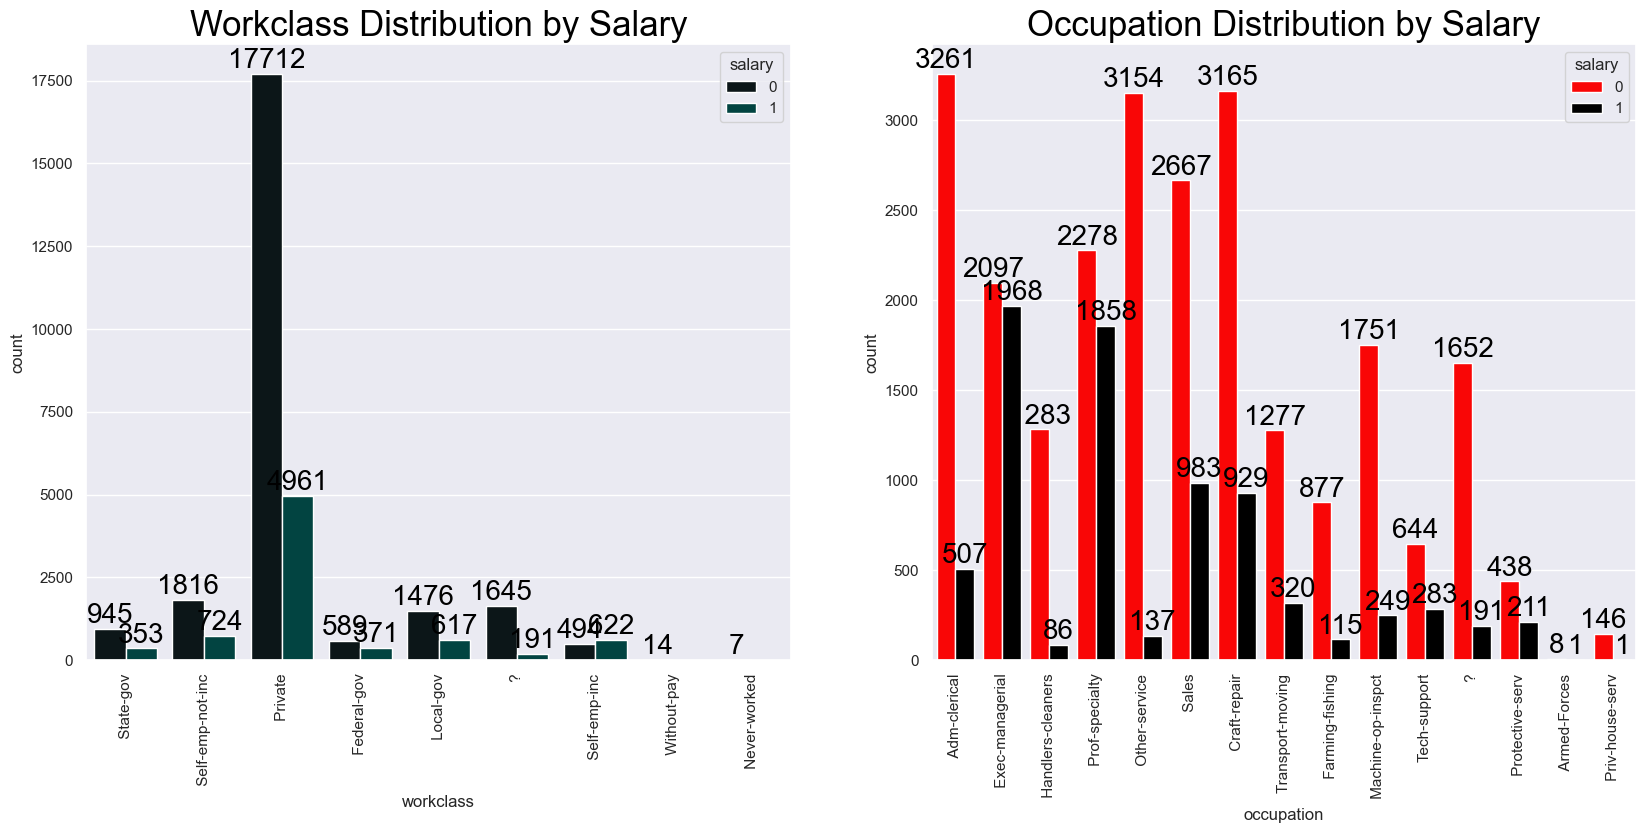

In [23]:
palette_workclass = {0: '#0c1618', 1: '#004643'}
palette_occupation = {0: '#ff0000', 1: '#000000'}

f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='workclass', data=df, palette=palette_workclass, hue='salary', saturation=0.95, ax=ax[0])
ax[0].set_title('Workclass Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='x', labelrotation=90) 

sns.countplot(x='occupation', data=df, palette=palette_occupation, hue='salary', saturation=0.95, ax=ax[1])
ax[1].set_title('Occupation Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='x', labelrotation=90)

plt.show()

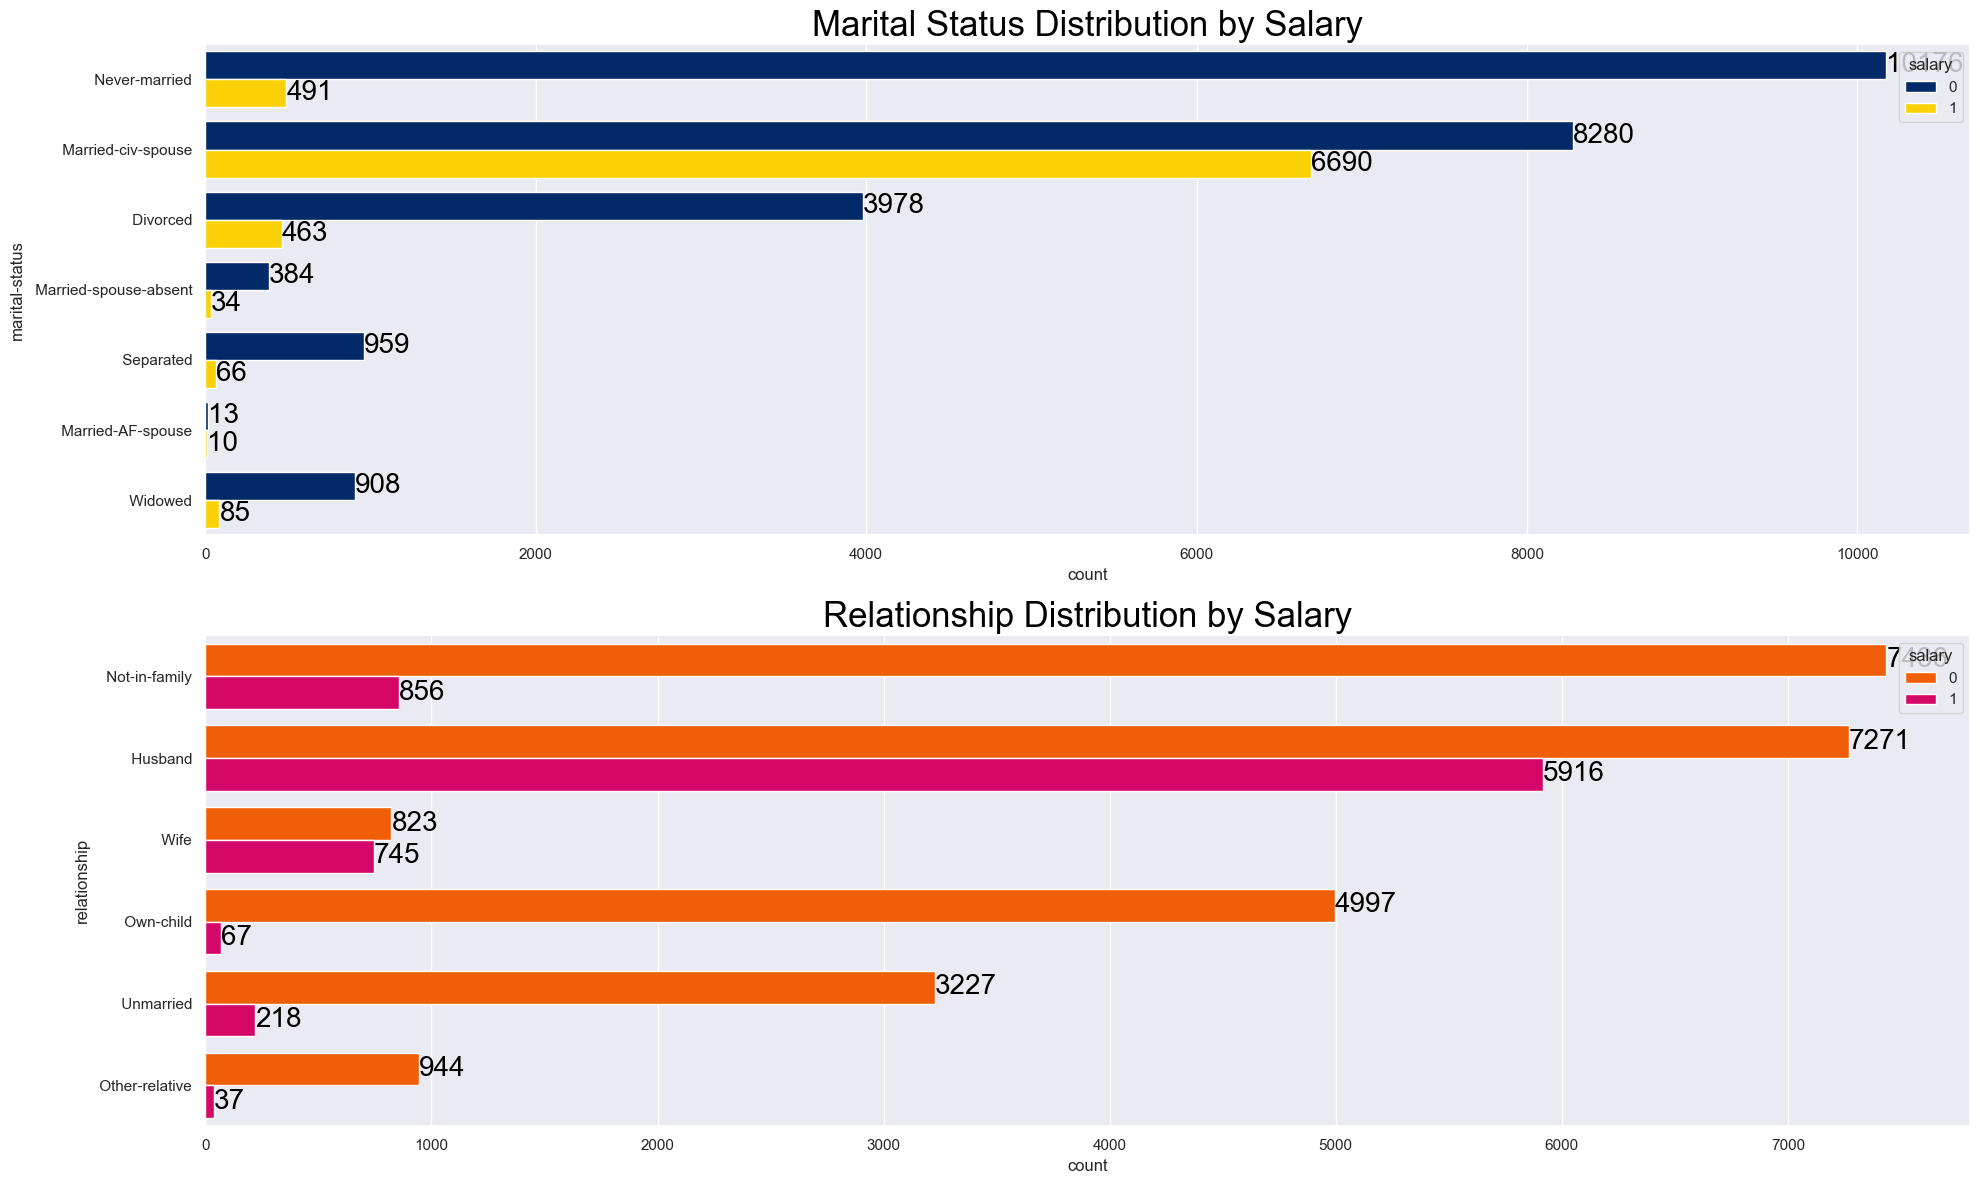

In [24]:
palette_workclass = {0: '#00296b', 1: '#ffd500'}
palette_occupation = {0: '#f75c03', 1: '#d90368'}

f, ax = plt.subplots(2, 1, figsize=(20, 12))
sns.countplot(y='marital-status', data=df, palette=palette_workclass, hue='salary', saturation=0.95, ax=ax[0])
ax[0].set_title('Marital Status Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='y', labelrotation=0)  

sns.countplot(y='relationship', data=df, palette=palette_occupation, hue='salary', saturation=0.95, ax=ax[1])
ax[1].set_title('Relationship Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='y', labelrotation=0)  

plt.tight_layout()
plt.show()

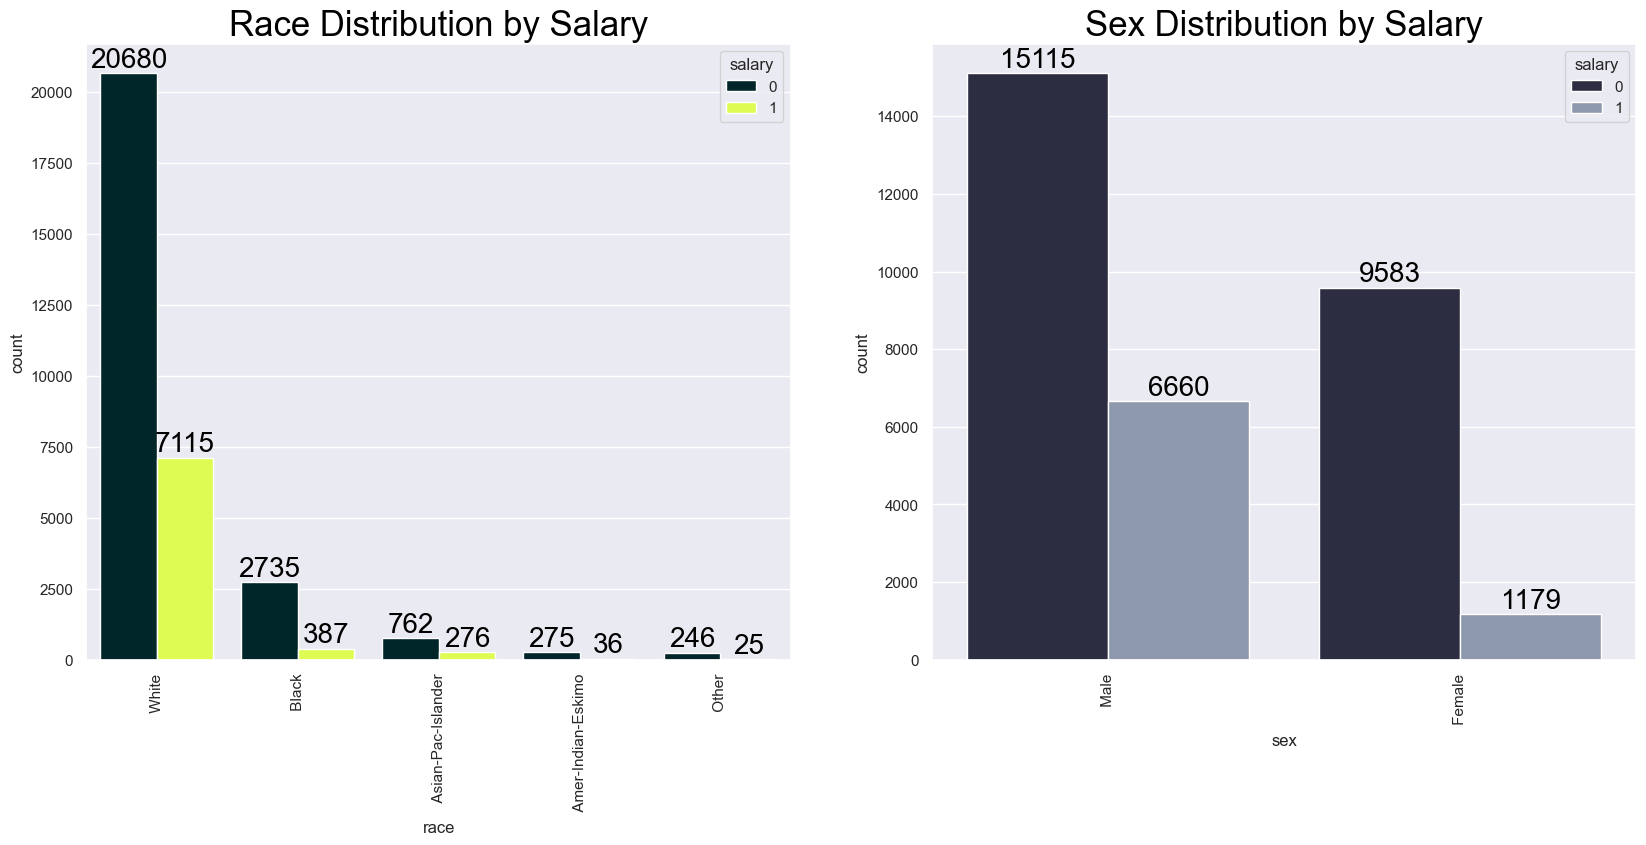

In [25]:
palette_workclass = {0: '#00272b', 1: '#e0ff4f'}
palette_occupation = {0: '#2b2d42', 1: '#8d99ae'}

f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='race', data=df, palette=palette_workclass, hue='salary', saturation=0.95, ax=ax[0])
ax[0].set_title('Race Distribution by Salary', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].tick_params(axis='x', labelrotation=90) 

sns.countplot(x='sex', data=df, palette=palette_occupation, hue='salary', saturation=0.95, ax=ax[1])
ax[1].set_title('Sex Distribution by Salary', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
ax[1].tick_params(axis='x', labelrotation=90)

plt.show()

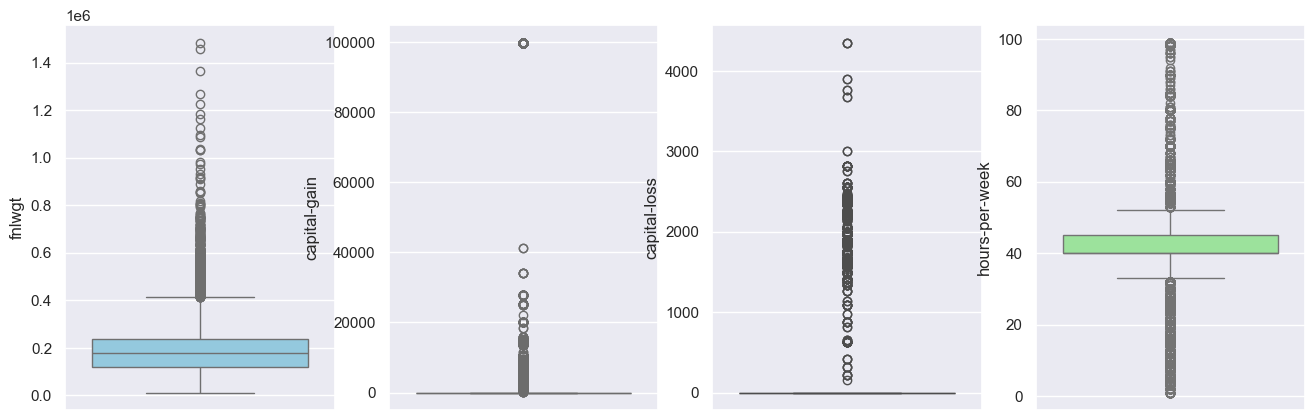

In [26]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['fnlwgt'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['capital-gain'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['capital-loss'],color='yellow')
plt.subplot(144)
sns.boxplot(df['hours-per-week'],color='lightgreen')
plt.show()

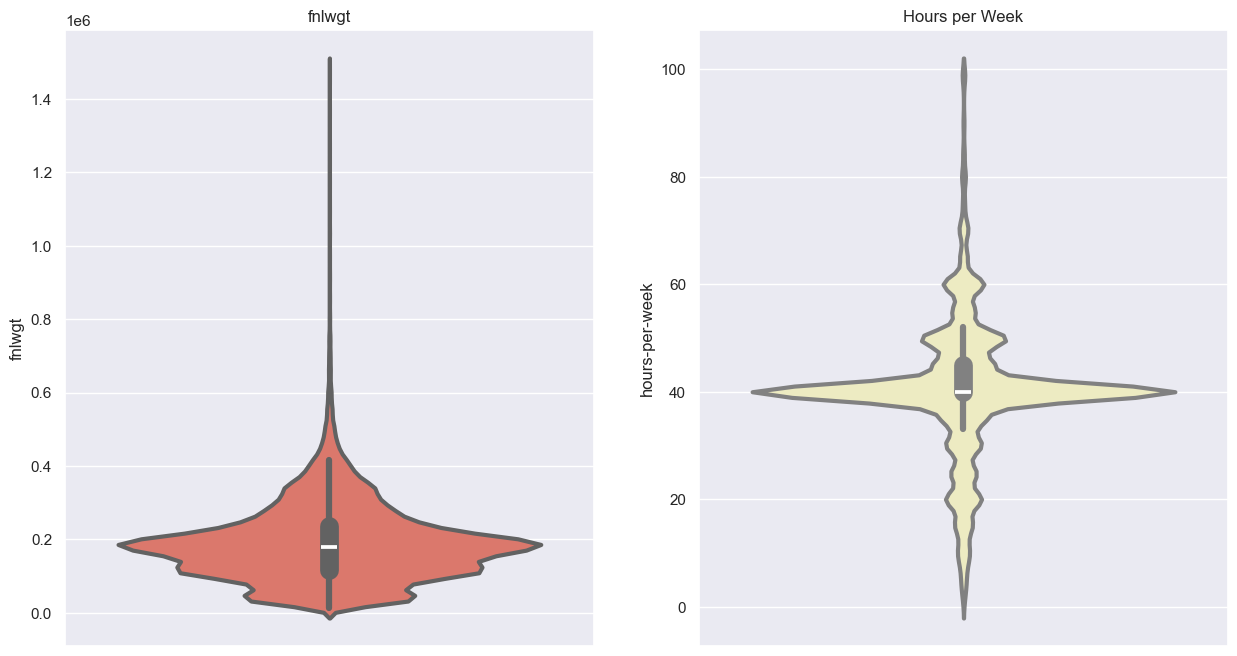

In [27]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('fnlwgt')
sns.violinplot(y='fnlwgt', data=df, color='#ed6a5a', linewidth=3)

plt.subplot(1, 2, 2)
plt.title('Hours per Week')
sns.violinplot(y='hours-per-week', data=df, color='#f4f1bb', linewidth=3)

plt.show()

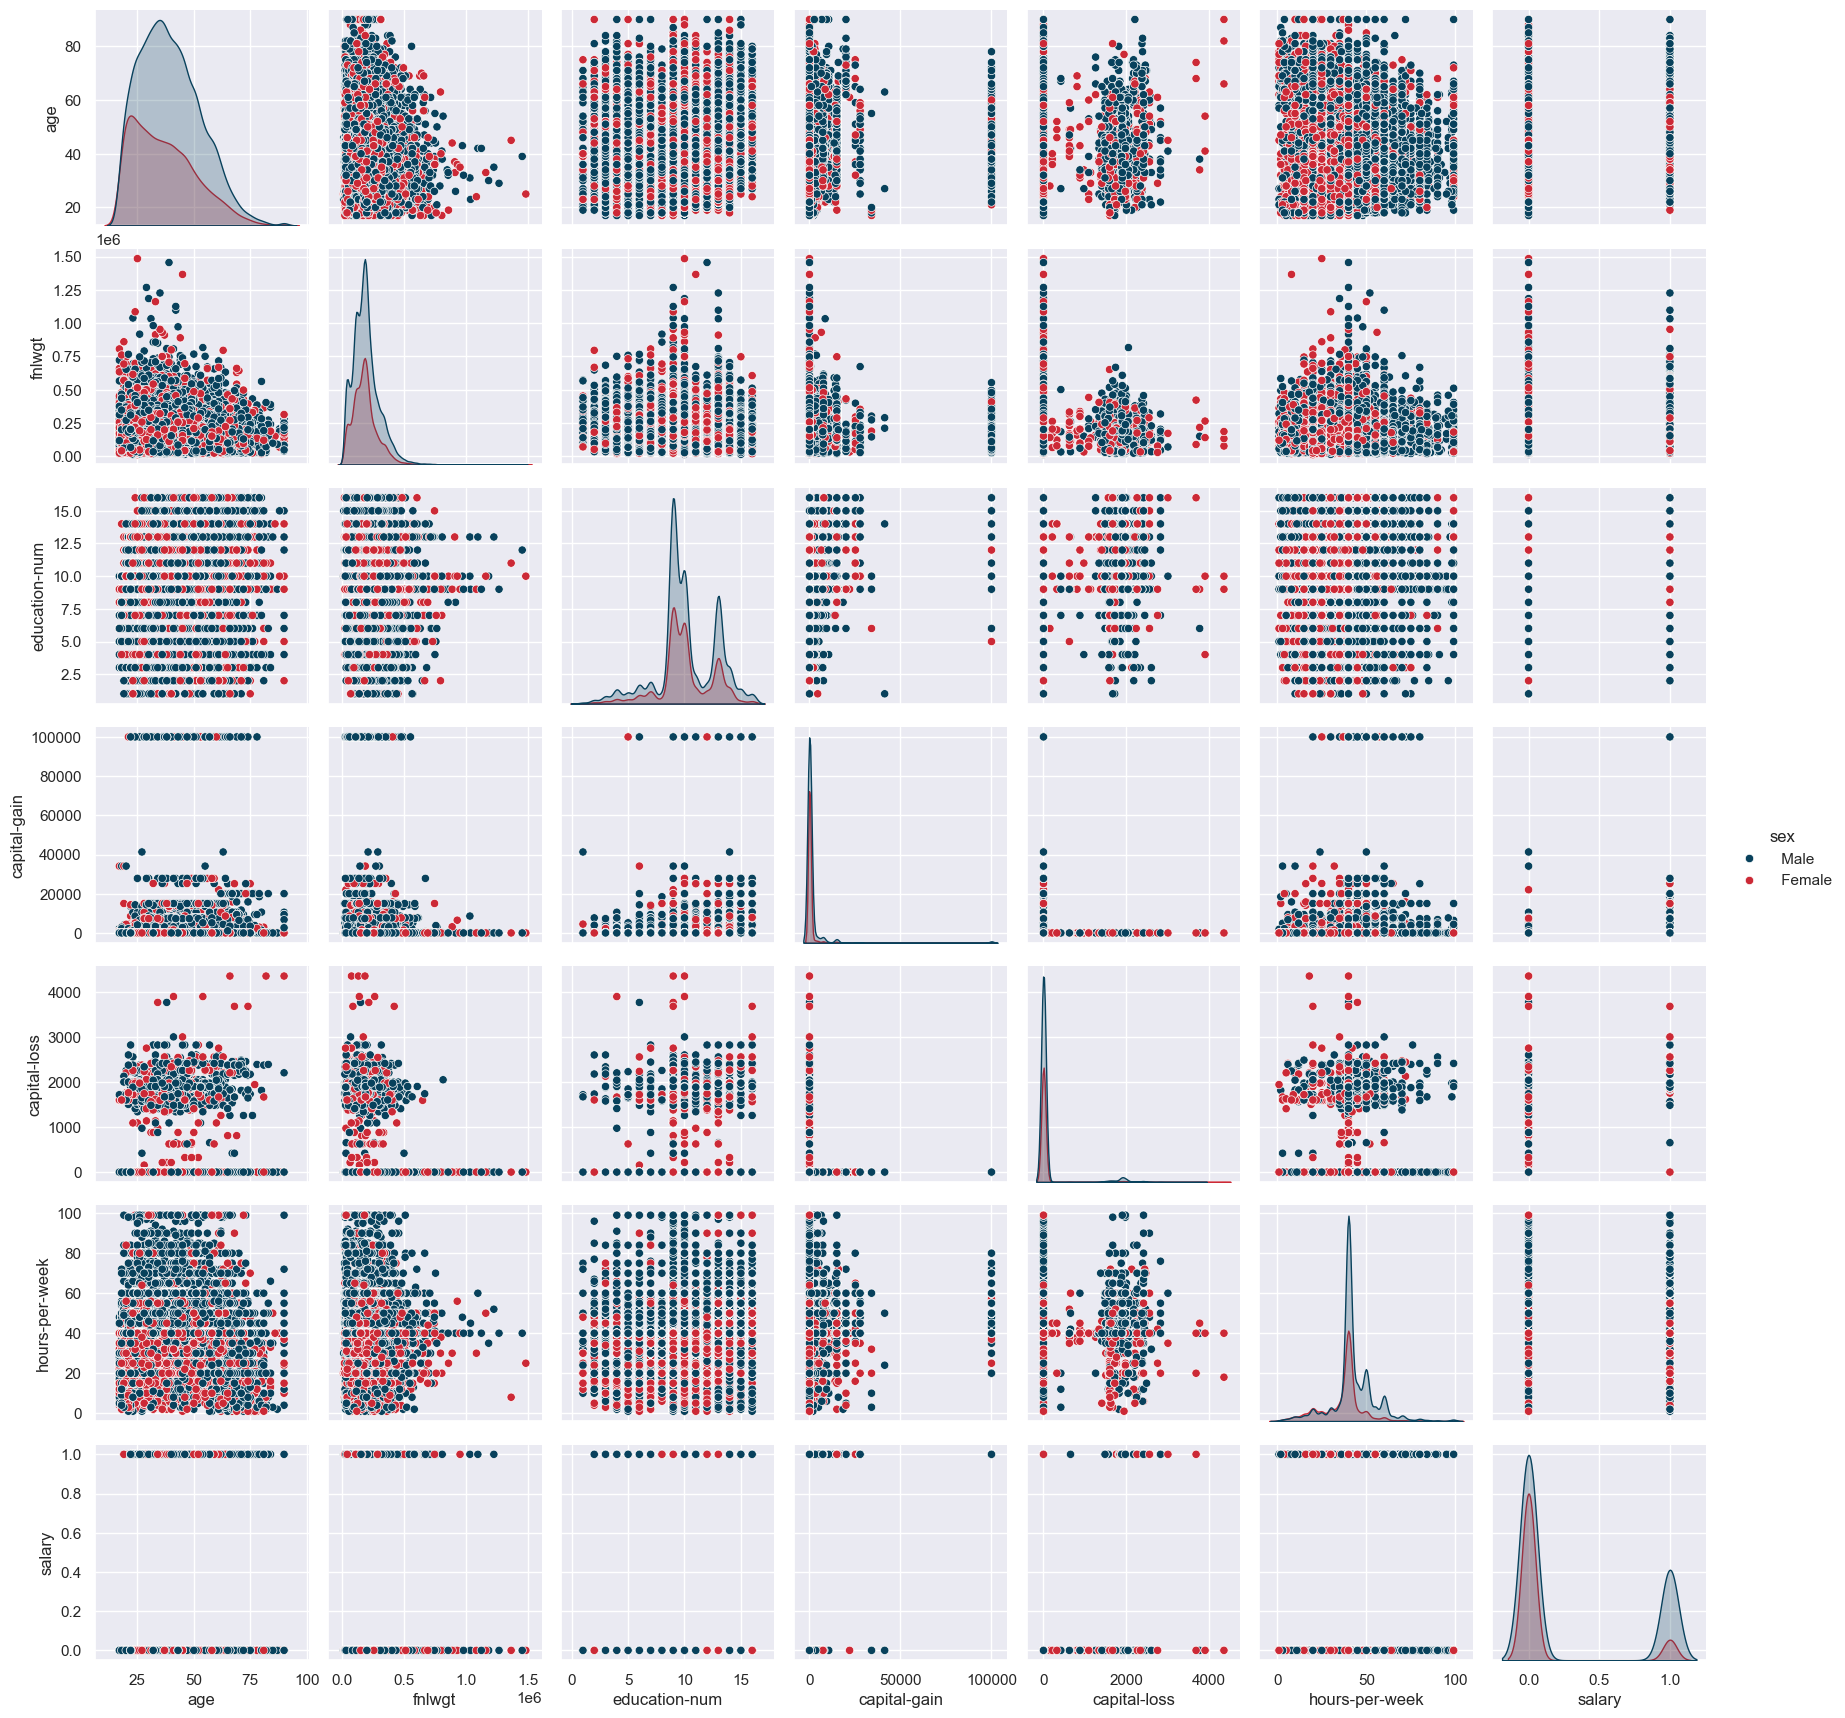

In [28]:
custom_palette = {' Male': '#08415c', ' Female': '#cc2936'}
sns.pairplot(df, hue='sex', palette=custom_palette)
plt.show()

# Model Building

#### Separate features and target variable

In [29]:
X = df.drop('salary', axis=1)
y = df['salary']

#### One-hot encode categorical features

In [30]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

#### Splitting the data into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training using SKLearn Pipeline

### Logistic Regression

In [32]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

In [33]:
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [34]:
print("Logistic Regression Classifier")
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier
Accuracy: 0.795021511985249
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      4905
           1       0.71      0.28      0.40      1603

    accuracy                           0.80      6508
   macro avg       0.76      0.62      0.64      6508
weighted avg       0.78      0.80      0.76      6508



### K- Nearest Neighbours (KNN)

In [35]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

In [36]:
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [37]:
print("K-Nearest Neighbors Classifier")
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier
Accuracy: 0.7728948985863553
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4905
           1       0.57      0.33      0.42      1603

    accuracy                           0.77      6508
   macro avg       0.69      0.62      0.64      6508
weighted avg       0.75      0.77      0.75      6508



### Support Vector Machine (SVM)

In [38]:
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

In [39]:
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

In [40]:
print("Support Vector Machine Classifier")
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier
Accuracy: 0.7957897971727105
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4905
           1       0.98      0.17      0.30      1603

    accuracy                           0.80      6508
   macro avg       0.88      0.59      0.59      6508
weighted avg       0.84      0.80      0.74      6508



### Decision Tree

In [41]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

In [42]:
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

In [43]:
print("Decision Tree Classifier")
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.8176090964966195
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4905
           1       0.63      0.64      0.63      1603

    accuracy                           0.82      6508
   macro avg       0.75      0.76      0.76      6508
weighted avg       0.82      0.82      0.82      6508



### Random Forest

In [44]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [46]:
print("Random Forest Classifier")
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.8534111862323295
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4905
           1       0.74      0.63      0.68      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508



### XGBoost 

In [47]:
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb.XGBClassifier(random_state=42))])

In [48]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

In [49]:
print("XGBoost Classifier")
acc_xg = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", acc_xg)
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier
Accuracy: 0.8718500307314075
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4905
           1       0.78      0.66      0.72      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508



### Adaboost

In [50]:
ada_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', AdaBoostClassifier(random_state=42))])

In [51]:
ada_pipeline.fit(X_train, y_train)
y_pred_ada = ada_pipeline.predict(X_test)

In [52]:
print("AdaBoost Classifier")
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", acc_ada)
print(classification_report(y_test, y_pred_ada))

AdaBoost Classifier
Accuracy: 0.8615550092194223
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4905
           1       0.77      0.63      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.83      0.78      0.80      6508
weighted avg       0.86      0.86      0.86      6508



### CatBoost

In [53]:
cat_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', CatBoostClassifier(random_state=42, verbose=0))])

In [54]:
cat_pipeline.fit(X_train, y_train)
y_pred_cat = cat_pipeline.predict(X_test)

In [55]:
print("CatBoost Classifier")
acc_cat = accuracy_score(y_test, y_pred_cat)
print("Accuracy:", acc_cat)
print(classification_report(y_test, y_pred_cat))

CatBoost Classifier
Accuracy: 0.8741548862937922
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4905
           1       0.79      0.66      0.72      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508



#### Storing all the models along with their accuracies in a dataframe

In [56]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','K Nearest Neighbours','Support Vector Machine','Decision Trees','Random Forests', 'XGBOOST', 'AdaBoost', 'CatBoost'],'Accuracy' : [acc_lr*100,acc_knn*100,acc_svm*100,acc_dt*100,acc_rf*100,acc_xg*100,acc_ada*100,acc_cat*100]})

In [57]:
model_acc

,Model,Accuracy
0,Logistic Regression,79.502151
1,K Nearest Neighbours,77.289490
2,Support Vector Machine,79.578980
3,Decision Trees,81.760910
4,Random Forests,85.341119
5,XGBOOST,87.185003
6,AdaBoost,86.155501
7,CatBoost,87.415489


### So these are all the models which we have trained using sklearn pipeline. And out of all these models CatBoost has the best performance which is 87.41%.

### Saving the best model

In [74]:
# Find the best model
best_row = model_acc.loc[model_acc['Accuracy'].idxmax()]
best_model = best_row['Model']
best_model_name = best_row['Model']
print(f"Best Model: {best_model_name} with Accuracy: {best_row['Accuracy']}")

Best Model: CatBoost with Accuracy: 87.41548862937923


In [77]:
# Save the best model to a pickle file
import pickle
# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved to 'best_model.pkl'")

Best model saved to 'best_model.pkl'
